>## Aplicação 04 - Classificação de flores

In [1]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder

#leitura do csv
dataset = './datasets/IRIS.csv'
data = pd.read_csv(dataset)


In [2]:
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
data['species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


> <li> Temos 3 classes de flores: Iris-setosa, Iris-versicolor e Iris-virginica.</li>
> <li> A ideia é, dados os valores de entrada (comprimento da petala, largura da pétala, comprimento da sepala, largura da sepala), classificar no tipo de flor.</li>
> <li> A ideia é utilizar o SVM Linear em 2 características e, sem seguida, em todas as 4.</li>

### Previsão com quatro características
Analisando a correlação das características com a matriz de correlação do pandas

In [5]:
# Verificação da correlação entre as características pelo coeficiente de Person. 
# A coluna da espécie foi removida para melhor visualização e por simplicidade (string)

data.drop('species',axis=1).corr(method='pearson', min_periods=1, numeric_only=False)

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.109369,0.871754,0.817954
sepal_width,-0.109369,1.000000,-0.420516,-0.356544
petal_length,0.871754,-0.420516,1.000000,0.962757
petal_width,0.817954,-0.356544,0.962757,1.000000


O comprimento e largura da pétala possuem correlação positiva e maior que zero com a maioria das demais características. Portanto, indicam serem bons pontos para o treinamento do modelo.
O comprimento da sépala também apresentou bons números.

In [6]:
lb = LabelEncoder()
classes_cdf = lb.fit(data['species'])

# Exibe a codificação do LabelEncoder
print(classes_cdf.classes_)
print(classes_cdf.transform(['Iris-setosa','Iris-versicolor','Iris-virginica']))

['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']
[0 1 2]


In [7]:
# Realiza a troca da String para valores inteiros e Ajusta o LabelEncoder com a coluna 'species'

data['species'] = classes_cdf.fit_transform(data['species'])
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [8]:
# Aqui são criados X_train e y_test, que são os subconjuntos de treino e teste

X_train, x_test = train_test_split(data, test_size=0.2)

In [9]:
# Subconjunto de treino

# y_train contém a classe de treino
y_train = X_train.pop('species')
y_test = x_test.pop('species')

In [10]:
# X_train agora possui apenas as caracteristas de treinamento do modelo.
# y_train possui o alvo.
X_train.head()

,sepal_length,sepal_width,petal_length,petal_width
110,6.5,3.2,5.1,2.0
112,6.8,3.0,5.5,2.1
1,4.9,3.0,1.4,0.2
98,5.1,2.5,3.0,1.1
111,6.4,2.7,5.3,1.9


In [11]:
# Uma vez preprocessados os dados, é hora do treino
cl_flor = SVC(kernel='linear')
cl_flor.fit(X_train,y_train)

SVC(kernel='linear')

In [12]:
# Agora, para testar os pesos obtidos com o treinamento, vamos usar o x_test. Assim, serão criadas as probabilidades da instância com os dados de teste
# As probabilidades ficarão armazenadas na variável y_pred (previsões)

y_pred = cl_flor.predict(x_test)

<AxesSubplot: >

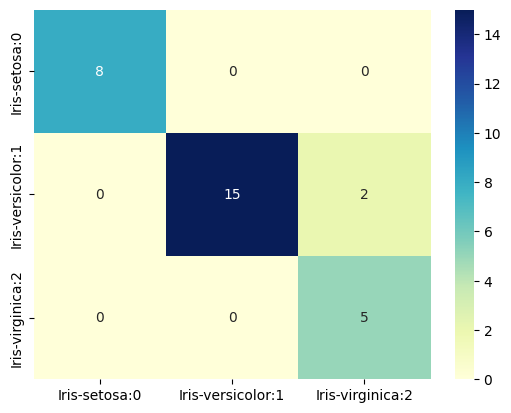

In [13]:
# Por fim, a fim de verificar as métricas, podemos usar a matriz de confusão.

# Aqui entra, finalmente, o y_test, que são os valores REAIS do banco de dados, sendo utilizados com os valores PREVISTOS anteriormente pelo modelo
matriz_confusao = confusion_matrix(y_test,y_pred)

# Graficos da matriz de confusão usando seaborn

cm_matrix = pd.DataFrame(data=matriz_confusao, 
                         columns=['Iris-setosa:0', 'Iris-versicolor:1','Iris-virginica:2'], 
                                 index=['Iris-setosa:0', 'Iris-versicolor:1','Iris-virginica:2'] )

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

In [14]:
# Predicting the result and giving the accuracy
score = cl_flor.score(x_test, y_test)

print(score)

0.9333333333333333


In [15]:
import warnings

# Suprimir aviso
warnings.filterwarnings("ignore", message="X does not have valid feature names")


#Função que recebe o conjunto de caracteristicas da instancia, faz a previsão da classe e, utilizando o encoder inverso, retorna a espécie
def previsao_flor(instancia):
    
    # Transforma a lista de dados de entrada em um DataFrame com os nomes das colunas corretos
    instancia_df = pd.DataFrame([instancia], columns=['sepal_length','sepal_width',
                                                      'petal_length','petal_width'])
    # Realiza a previsão e reverte a codificação  
    p = classes_cdf.inverse_transform(cl_flor.predict([instancia]))
    return p[0]

c_petala = float(input("Digite o comprimento da pétala da flor: "))
l_petala = float(input("Digite a largura da pétala da flor: "))

c_sepala = float(input("Digite o comprimento da sépala da flor: "))
l_sepala = float(input("Digite a largura da sépala da flor: "))

dados = [c_petala,l_petala,c_sepala,l_sepala]

print("Essa flor é uma {}".format(previsao_flor(dados)))

Digite o comprimento da pétala da flor:  4.4
Digite a largura da pétala da flor:  3.0
Digite o comprimento da sépala da flor:  1.9
Digite a largura da sépala da flor:  0.3


Essa flor é uma Iris-setosa
